# **I. Import Libraries**

**Library yang digunakan adalah Numpy, Pandas, Sklearn, Scipy, Plotly, Seaborn**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# For Unsupervised Clustering
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

# from sklearnex import patch_sklearn #untuk mempercepat model
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVC # Support Vector Machine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer

sns.set_theme(style='darkgrid', palette='deep')

%matplotlib inline

# **II. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll

### **B. Menyimpan Data**

Data yang sudah diakses kemudian disimpan dengan nama file **'dataset.csv'** Untuk untuk kemudian data tersebut diload

In [2]:
from google.colab import drive
drive.mount('/content/drive') ## bisa diganti dengan mengupload data ke dalam google colab

## untuk saat ini saya menggunakan drive google, artinya dataset disimpan didrive google

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **C. *Data Loading***

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Dataset_Train/dataset.csv", error_bad_lines=False)
pd.set_option("display.max.columns",None) # digunakan untuk menampilkan keseluruhan kolom pada dataset
pd.set_option('display.max_row', 10)
data.head()

,EMPLOYEE_ID,PHONE_PROVIDER,ASSIGNMENT,BILLING_PERIOD,POSITION_ID,PRIM_RPT_CODES,DOM_NO,INT_NO,DOM_DURATION,INT_DURATION,DOM_COST,INT_COST,EMAIL_1,EMAIL_2,CLOSED,APPROVED,APPROVED_DATE,PIN_TYPE,BUSINESS_DATA_COST,PERSONAL_DATA_COST,STAGED_AT
0,911015,PBX,B,200206,C050001,CTR ... ... ... ... ...,18,0,002:20:54,000:00:00,282629,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-31T13:51:42.459Z
1,911015,PBX,B,200207,C050001,CTR ... ... ... ... ...,37,0,005:09:42,000:00:00,495482,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-31T13:51:42.459Z
2,911015,PBX,B,200208,C050001,CTR ... ... ... ... ...,35,0,003:20:30,000:00:00,386027,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-31T13:51:42.459Z
3,911015,PBX,B,200209,C050001,CTR ... ... ... ... ...,37,0,004:31:36,000:00:00,529697,0,18-MAY-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-31T13:51:42.459Z
4,911015,PBX,B,200210,C050001,CTR ... ... ... ... ...,35,0,004:20:30,000:00:00,452044,0,18-MAY-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-31T13:51:42.459Z


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558648 entries, 0 to 558647
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   EMPLOYEE_ID         558648 non-null  object 
 1   PHONE_PROVIDER      558648 non-null  object 
 2   ASSIGNMENT          558648 non-null  object 
 3   BILLING_PERIOD      558648 non-null  int64  
 4   POSITION_ID         556915 non-null  object 
 5   PRIM_RPT_CODES      553853 non-null  object 
 6   DOM_NO              558648 non-null  int64  
 7   INT_NO              558648 non-null  int64  
 8   DOM_DURATION        547661 non-null  object 
 9   INT_DURATION        547661 non-null  object 
 10  DOM_COST            558648 non-null  int64  
 11  INT_COST            558648 non-null  int64  
 12  EMAIL_1             50364 non-null   object 
 13  EMAIL_2             51669 non-null   object 
 14  CLOSED              138316 non-null  object 
 15  APPROVED            201711 non-nul

In [5]:
# Menampilkan kolom yang memiliki nilai null
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

POSITION_ID             1733
PRIM_RPT_CODES          4795
DOM_DURATION           10987
INT_DURATION           10987
EMAIL_1               508284
                       ...  
APPROVED              356937
APPROVED_DATE         356921
PIN_TYPE              109789
BUSINESS_DATA_COST    357733
PERSONAL_DATA_COST    357733
Length: 12, dtype: int64

In [6]:
# Menghitung jumlah nilai null per kolom
null_count_per_column = data.isnull().sum()

# Total baris dalam DataFrame
total_rows = data.shape[0]

# Membuat DataFrame untuk menyimpan jumlah nilai null per kolom dan persentase null
null_info = pd.DataFrame({
    'Total Null': null_count_per_column,
    'Percentage Null': (null_count_per_column / total_rows) * 100
})

# Menampilkan informasi nilai null per kolom dan persentasenya
null_info

,Total Null,Percentage Null
EMPLOYEE_ID,0,0.000000
PHONE_PROVIDER,0,0.000000
ASSIGNMENT,0,0.000000
BILLING_PERIOD,0,0.000000
POSITION_ID,1733,0.310213
...,...,...
APPROVED_DATE,356921,63.890142
PIN_TYPE,109789,19.652626
BUSINESS_DATA_COST,357733,64.035493
PERSONAL_DATA_COST,357733,64.035493


In [7]:
# Assuming you already have a DataFrame named 'data' and both columns exist
data['BUSINESS_DATA_COST'] = pd.to_numeric(data['BUSINESS_DATA_COST'], errors='coerce')
data['PERSONAL_DATA_COST'] = pd.to_numeric(data['PERSONAL_DATA_COST'], errors='coerce')

In [8]:
## Dataset -> membagi dataset menjadi 4, yaitu business_dataset, personal_dataset, dan business_clean dan personal_clean
## perbedaaan antara clean dan dataset adalah, data clean merupakan dataset yang tidak memiliki null value dan value = 0
## sementara dataset saja, mengambil data yang != 0 lalu value yang null, di isi dengan mean
business_dataset = data[(data['BUSINESS_DATA_COST']!=0)]
personal_dataset = data[(data['PERSONAL_DATA_COST']!=0)]

business_clean = data[(data['BUSINESS_DATA_COST']!=0)&(data['BUSINESS_DATA_COST'].notnull())]
personal_clean = data[(data['PERSONAL_DATA_COST']!=0)&(data['PERSONAL_DATA_COST'].notnull())]

In [9]:
business_clean

,EMPLOYEE_ID,PHONE_PROVIDER,ASSIGNMENT,BILLING_PERIOD,POSITION_ID,PRIM_RPT_CODES,DOM_NO,INT_NO,DOM_DURATION,INT_DURATION,DOM_COST,INT_COST,EMAIL_1,EMAIL_2,CLOSED,APPROVED,APPROVED_DATE,PIN_TYPE,BUSINESS_DATA_COST,PERSONAL_DATA_COST,STAGED_AT
838,10000021,TELKOMSEL,B,202207,99999999,NaN,1,0,,,0,0,NaN,Y,NaN,NaN,NaN,T,75000.0,0.0,2023-07-31T13:51:42.459Z
839,10000021,TELKOMSEL,B,202208,99999999,NaN,1,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,75000.0,0.0,2023-07-31T13:51:42.459Z
840,10000021,TELKOMSEL,B,202209,99999999,NaN,1,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,75000.0,0.0,2023-07-31T13:51:42.459Z
841,10000021,TELKOMSEL,B,202210,99999999,NaN,1,0,,,0,0,NaN,Y,NaN,NaN,NaN,T,75000.0,0.0,2023-07-31T13:51:42.459Z
842,10000021,TELKOMSEL,B,202211,99999999,NaN,1,0,,,0,0,NaN,NaN,NaN,NaN,NaN,T,75000.0,0.0,2023-07-31T13:51:42.459Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557377,XJ9004,TELKOMSEL,B,201803,AMN0005,NNT ... ... ... ... ...,1,0,,,0,0,NaN,NaN,NaN,NaN,NaN,T,125000.0,0.0,2023-07-31T13:51:42.459Z
557378,XJ9004,TELKOMSEL,B,201804,AMN0005,NNT ... ... ... ... ...,1,0,,,0,0,NaN,NaN,NaN,NaN,NaN,T,125000.0,0.0,2023-07-31T13:51:42.459Z
557379,XJ9004,TELKOMSEL,B,201805,AMN0005,NNT ... ... ... ... ...,21,3,,,32556,238317,NaN,NaN,NaN,NaN,NaN,T,125000.0,0.0,2023-07-31T13:51:42.459Z
557380,XJ9004,TELKOMSEL,B,201806,AMN0005,NNT ... ... ... ... ...,3,0,,,545635,0,NaN,NaN,NaN,NaN,NaN,T,125000.0,0.0,2023-07-31T13:51:42.459Z


In [10]:
# Tahapan ini digunakan untuk mengisi dataset business dan personal yang memiliki value null digantikan dengan value mean
mean_value_business = data['BUSINESS_DATA_COST'].mean()
mean_value_personal = data['PERSONAL_DATA_COST'].mean()
business_dataset['BUSINESS_DATA_COST'].fillna(mean_value_business, inplace=True)
personal_dataset['PERSONAL_DATA_COST'].fillna(mean_value_personal, inplace=True)

In [11]:
business_dataset.describe()

,BILLING_PERIOD,DOM_NO,INT_NO,DOM_COST,INT_COST,BUSINESS_DATA_COST,PERSONAL_DATA_COST
count,379587.000000,379587.000000,379587.000000,3.795870e+05,3.795870e+05,3.795870e+05,21854.000000
mean,200897.932909,107.937219,1.479150,1.632097e+05,4.856489e+04,2.202218e+04,191.498124
std,406.875131,416.314685,23.465695,4.033878e+05,3.410694e+05,4.293232e+04,5570.355065
min,200204.000000,-95.000000,-8.000000,-2.984740e+05,-6.552450e+05,1.131000e+04,0.000000
25%,200607.000000,6.000000,0.000000,1.846700e+04,0.000000e+00,1.496351e+04,0.000000
50%,200902.000000,30.000000,0.000000,7.613600e+04,0.000000e+00,1.496351e+04,0.000000
75%,201110.000000,124.000000,0.000000,1.880485e+05,0.000000e+00,1.496351e+04,0.000000
max,202306.000000,69517.000000,2694.000000,3.277256e+07,2.864604e+07,3.200000e+06,300000.000000


## Drop Kolom untuk memilih hanya kolom yang memiliki korelasi dengan data target

In [12]:
columns_to_drop = ['DOM_DURATION', 'INT_DURATION',
    'BILLING_PERIOD', 'DOM_NO', 'INT_NO', 'EMPLOYEE_ID', 'PHONE_PROVIDER', 'ASSIGNMENT','BILLING_PERIOD','POSITION_ID',
    'PRIM_RPT_CODES','EMAIL_1','EMAIL_2','CLOSED','APPROVED','APPROVED_DATE','PIN_TYPE','STAGED_AT','PERSONAL_DATA_COST'
]

# Drop kolom-kolom yang tidak diperlukan
business_dataset = business_dataset.drop(columns=columns_to_drop)
business_clean = business_clean.drop(columns=columns_to_drop)

# Tampilkan lima baris pertama DataFrame setelah penghapusan
business_dataset.head()

,DOM_COST,INT_COST,BUSINESS_DATA_COST
0,282629,0,14963.505025
1,495482,0,14963.505025
2,386027,0,14963.505025
3,529697,0,14963.505025
4,452044,0,14963.505025


In [13]:
columns_to_drop = ['DOM_DURATION', 'INT_DURATION',
    'BILLING_PERIOD', 'DOM_NO', 'INT_NO','EMPLOYEE_ID', 'PHONE_PROVIDER', 'ASSIGNMENT','BILLING_PERIOD','POSITION_ID',
    'PRIM_RPT_CODES','EMAIL_1','EMAIL_2','CLOSED','APPROVED','APPROVED_DATE','PIN_TYPE','STAGED_AT','BUSINESS_DATA_COST'
]

# Drop kolom-kolom yang tidak diperlukan
personal_dataset = personal_dataset.drop(columns=columns_to_drop)
personal_clean = personal_clean.drop(columns=columns_to_drop)

# Tampilkan lima baris pertama DataFrame setelah penghapusan
personal_dataset.head()

,DOM_COST,INT_COST,PERSONAL_DATA_COST
0,282629,0,3412.454351
1,495482,0,3412.454351
2,386027,0,3412.454351
3,529697,0,3412.454351
4,452044,0,3412.454351


In [14]:
business_dataset.duplicated().sum() # mengecek apakah terdapat duplikasi pada dataset yang diload

147068

In [15]:
business_dataset.drop_duplicates(inplace = True)
personal_dataset.drop_duplicates(inplace = True)

In [16]:
personal_dataset

,DOM_COST,INT_COST,PERSONAL_DATA_COST
0,282629,0,3412.454351
1,495482,0,3412.454351
2,386027,0,3412.454351
3,529697,0,3412.454351
4,452044,0,3412.454351
...,...,...,...
558546,1786838,696375,3412.454351
558547,3008980,2122419,3412.454351
558640,124146,0,3412.454351
558641,175110,0,3412.454351


In [17]:
# Menghitung jumlah nilai 0 pada kolom 'BUSINESS_DATA_COST' dan 'PERSONAL_DATA_COST'
zero_count_business_data_cost = (business_dataset['BUSINESS_DATA_COST'] == 0).sum()
zero_count_personal_data_cost = (personal_dataset['PERSONAL_DATA_COST'] == 0).sum()

# Total baris dalam DataFrame
total_rows = personal_dataset.shape[0]

# Menghitung persentase nilai 0
percentage_business_data_cost = (zero_count_business_data_cost / total_rows) * 100
percentage_personal_data_cost = (zero_count_personal_data_cost / total_rows) * 100

# Membuat DataFrame untuk menyajikan hasil
result_data = pd.DataFrame({
    'Column': ['BUSINESS_DATA_COST', 'PERSONAL_DATA_COST'],
    'Zero Count': [zero_count_business_data_cost, zero_count_personal_data_cost],
    'Total Rows': [total_rows, total_rows],
    'Percentage of Zeros': [percentage_business_data_cost, percentage_personal_data_cost]
})

result_data

,Column,Zero Count,Total Rows,Percentage of Zeros
0,BUSINESS_DATA_COST,0,226953,0.0
1,PERSONAL_DATA_COST,0,226953,0.0


In [18]:
personal_dataset.describe()

,DOM_COST,INT_COST,PERSONAL_DATA_COST
count,2.269530e+05,2.269530e+05,226953.000000
mean,2.346216e+05,7.672423e+04,6205.222398
std,4.780454e+05,4.189812e+05,18757.019572
min,-2.984740e+05,-6.552450e+05,2520.000000
25%,5.306900e+04,0.000000e+00,3412.454351
50%,1.345360e+05,0.000000e+00,3412.454351
75%,2.629720e+05,0.000000e+00,3412.454351
max,3.277256e+07,2.864604e+07,450000.000000


In [19]:
# import plotly.express as px

# # Visualisasi BUSINESS_DATA_COST
# fig = px.histogram(business_dataset, x='BUSINESS_DATA_COST', nbins=30, labels={'BUSINESS_DATA_COST': 'Value'})
# fig.update_layout(title='Histogram BUSINESS_DATA_COST', xaxis_title='Value', yaxis_title='Frequency')
# fig.show()

# # Visualisasi PERSONAL_DATA_COST
# fig = px.histogram(personal_dataset, x='PERSONAL_DATA_COST', nbins=30, labels={'PERSONAL_DATA_COST': 'Value'})
# fig.update_layout(title='Histogram PERSONAL_DATA_COST', xaxis_title='Value', yaxis_title='Frequency')
# fig.show()


In [20]:
personal_dataset.count()

DOM_COST              226953
INT_COST              226953
PERSONAL_DATA_COST    226953
dtype: int64

In [21]:
# check missing values dalam dataset
pd.set_option('display.max_row', 21)
personal_dataset.isna().sum().sort_values(ascending=False)

DOM_COST              0
INT_COST              0
PERSONAL_DATA_COST    0
dtype: int64

In [22]:
personal_dataset.shape

(226953, 3)

In [23]:
personal_dataset['PERSONAL_DATA_COST'] = personal_dataset['PERSONAL_DATA_COST'].round().astype(int)
business_dataset['BUSINESS_DATA_COST'] = business_dataset['BUSINESS_DATA_COST'].round().astype(int)

In [24]:
personal_dataset.info() # Hanya untuk memberikan informasi jenis tipe data dan terdapat kolom apa saja pada dataset tersebut

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226953 entries, 0 to 558647
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   DOM_COST            226953 non-null  int64
 1   INT_COST            226953 non-null  int64
 2   PERSONAL_DATA_COST  226953 non-null  int64
dtypes: int64(3)
memory usage: 6.9 MB


In [25]:
personal_dataset.describe().T # melihat gambaran singkat terkait dataset

,count,mean,std,min,25%,50%,75%,max
DOM_COST,226953.0,234621.611898,478045.445986,-298474.0,53069.0,134536.0,262972.0,32772562.0
INT_COST,226953.0,76724.227131,418981.247100,-655245.0,0.0,0.0,0.0,28646038.0
PERSONAL_DATA_COST,226953.0,6204.778813,18757.085619,2520.0,3412.0,3412.0,3412.0,450000.0


# **III. *Exploratory Data Analysis (EDA)***

Tahapan ini dilakukan untuk mengenal lebih dalam terkait masing-masing *feature* serta untuk dapat memberikan gambaran dasar secara umum feature-feature apa saja saling berkorelasi

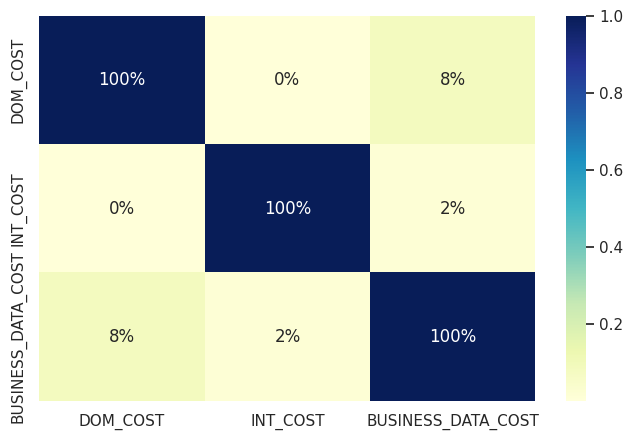

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(business_dataset.corr(), annot=True,mask=None, cmap='YlGnBu',fmt='.0%', )
plt.show()

**Berdasarkan Heat Map diatas kita dapat melihat bahwa terdapat korelasi antara business data cost dengan int cost ataupun dom cost, walaupun secara value korelasi tersebut cenderung tidak terlalu besar**


**Melihat tipe data/pengelompokan masing masing kolom**

In [27]:
# List of datasets
datasets = [business_dataset, personal_dataset]

# Dictionary to store numerical and categorical columns for each dataset
num_columns = {}
cat_columns = {}

# Loop through datasets
for i, df in enumerate(datasets):
    # Identify numerical and categorical columns for the current dataset
    num_columns[i] = df.select_dtypes(include=np.number).columns.tolist()
    cat_columns[i] = df.select_dtypes(include=['object']).columns.tolist()

    # Print the results
    print(f'Dataset {i + 1}:')
    print('Numerical Columns   : ', num_columns[i])
    print('Categorical Columns : ', cat_columns[i])
    print('\n')

Dataset 1:
Numerical Columns   :  ['DOM_COST', 'INT_COST', 'BUSINESS_DATA_COST']
Categorical Columns :  []


Dataset 2:
Numerical Columns   :  ['DOM_COST', 'INT_COST', 'PERSONAL_DATA_COST']
Categorical Columns :  []




**pada dataset diatas tidak terdapat kolom kategorikal**


# **IV. *Data Preprocessing***

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi *data inference*, transformasi data (*encoding*, dll.), dan proses-proses lain yang dibutuhkan.

## **A. *Get Data for Model Inference***

Tahapan ini digunakan untuk menyimpan beberapa dataset sebagai sample yang kemudian nantinya model yang sudah terbentuk akan diuji menggunakan model inference ini. dan untuk mengetahui apakah model yang terbuat sudah sesuai dengan kondisi nyatanya.

tahapan ini akan membuat 4 dataset yang telah terbentuk, untuk di training, dan kemudian nantinya akan membandingkan apakah dataset clean vs dataset yang sudah di isi null value dengan mean, lebih baik yang mana dalam pemodelan ini


In [28]:
data_inf_business_dataset = business_dataset.sample(20, random_state=25) # no random state dipilih secara acak
data_inf_business_clean = business_clean.sample(20, random_state=25) # no random state dipilih secara acak
data_inf_personal_dataset = personal_dataset.sample(20, random_state=25) # no random state dipilih secara acak
data_inf_personal_clean = personal_clean.sample(20, random_state=25) # no random state dipilih secara acak

In [29]:
X_train_bd = business_dataset.drop(data_inf_business_dataset.index) # mengeluarkan data inference dari data train untuk business dataset
X_train_bc = business_clean.drop(data_inf_business_clean.index) # mengeluarkan data inference dari data train untuk business clean
X_train_pd = personal_dataset.drop(data_inf_personal_dataset.index) # mengeluarkan data inference dari data train untuk personal dataset
X_train_pc = personal_clean.drop(data_inf_personal_clean.index) # mengeluarkan data inference dari data train untuk personal clean

In [30]:
X_train_bd.reset_index(drop=True, inplace=True)
X_train_bc.reset_index(drop=True, inplace=True)
X_train_pd.reset_index(drop=True, inplace=True)
X_train_pc.reset_index(drop=True, inplace=True)

data_inf_business_dataset.reset_index(drop=True, inplace=True)
data_inf_business_clean.reset_index(drop=True, inplace=True)
data_inf_personal_dataset.reset_index(drop=True, inplace=True)
data_inf_personal_clean.reset_index(drop=True, inplace=True)

## ***B. Splitting Dataset***

Tahapan ini digunakan membagi Data Train yang sebelumnya telah dibuat kemudian membaginya menjadi X_train, X_test, y_train, y_test

In [31]:
# Split between `X` (Features) and `y` (Target)
X_bd = X_train_bd.drop('BUSINESS_DATA_COST', axis=1)
y_bd = X_train_bd['BUSINESS_DATA_COST']
X_bc = X_train_bc.drop('BUSINESS_DATA_COST', axis=1)
y_bc = X_train_bc['BUSINESS_DATA_COST']

## personal dataset
X_pd = X_train_pd.drop('PERSONAL_DATA_COST', axis=1)
y_pd = X_train_pd['PERSONAL_DATA_COST']
X_pc = X_train_pc.drop('PERSONAL_DATA_COST', axis=1)
y_pc = X_train_pc['PERSONAL_DATA_COST']

X_bd

,DOM_COST,INT_COST
0,282629,0
1,495482,0
2,386027,0
3,529697,0
4,452044,0
...,...,...
232494,1786838,696375
232495,3008980,2122419
232496,124146,0
232497,175110,0


In [32]:
# Membagi Train-Set and Test-Set
from sklearn.model_selection import train_test_split
X_train_bd, X_test_bd, y_train_bd, y_test_bd = train_test_split(X_bd, y_bd, test_size=0.2, random_state=97)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=97)

## PERSONAL DATASET
X_train_pd, X_test_pd, y_train_pd, y_test_pd = train_test_split(X_pd, y_pd, test_size=0.2, random_state=97)
X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(X_pc, y_pc, test_size=0.2, random_state=97)

print('Train Size : ', X_train_bd.shape)
print('Test Size  : ', X_test_bd.shape)

Train Size :  (185999, 2)
Test Size  :  (46500, 2)


Pada data train teriri atas 185999 rows dan 2 kolom sementara pada data test size terdiri atas 46500 rows dan 2 kolom

## **C. *Feature Selection***

In [33]:
business_dataset.columns #menampilkan kolom yang tersedia pada dataframe [data]

Index(['DOM_COST', 'INT_COST', 'BUSINESS_DATA_COST'], dtype='object')

Berdasarkan hasil EDA pada tahapan sebelumnya maka didapatkan bahwa feature yang digunakan hanya dom cost dan int cos

In [34]:
select_feature =['DOM_COST','INT_COST'] #memilih feature selain feature gender dan phone service

In [35]:
datasets = [(X_train_bd, X_test_bd), (X_train_bc, X_test_bc), (X_train_pd, X_test_pd), (X_train_pc, X_test_pc)]
selected_datasets = []

for X_train, X_test in datasets:
    X_train_selected = X_train[select_feature]
    X_test_selected = X_test[select_feature]
    selected_datasets.append((X_train_selected, X_test_selected))

# Unpack the selected datasets
(X_train_fix_bd, X_test_bd), (X_train_fix_bc, X_test_bc), (X_train_fix_pd, X_test_pd), (X_train_fix_pc, X_test_pc) = selected_datasets

## **D. *Handling Missing Value***

Setelah membagi data train, data test, y train dan y test maka tahapan selanjutnya adalah mengecek missing value pada setiap data tersebut

In [36]:
datasets = [X_train_fix_bd, X_test_bd, X_train_fix_bc, X_test_bc, X_train_fix_pd, X_test_pd, X_train_fix_pc, X_test_pc]
dataset_names = ['X_train_fix_bd', 'X_test_bd', 'X_train_fix_bc', 'X_test_bc', 'X_train_fix_pd', 'X_test_pd', 'X_train_fix_pc', 'X_test_pc']

for name, dataset in zip(dataset_names, datasets):
    missing_values = dataset.isna().sum()
    print(f"Missing values in {name}:\n{missing_values}\n{'-'*30}")


Missing values in X_train_fix_bd:
DOM_COST    0
INT_COST    0
dtype: int64
------------------------------
Missing values in X_test_bd:
DOM_COST    0
INT_COST    0
dtype: int64
------------------------------
Missing values in X_train_fix_bc:
DOM_COST    0
INT_COST    0
dtype: int64
------------------------------
Missing values in X_test_bc:
DOM_COST    0
INT_COST    0
dtype: int64
------------------------------
Missing values in X_train_fix_pd:
DOM_COST    0
INT_COST    0
dtype: int64
------------------------------
Missing values in X_test_pd:
DOM_COST    0
INT_COST    0
dtype: int64
------------------------------
Missing values in X_train_fix_pc:
DOM_COST    0
INT_COST    0
dtype: int64
------------------------------
Missing values in X_test_pc:
DOM_COST    0
INT_COST    0
dtype: int64
------------------------------


tidak terdapat missing value pada setiap dataset


## **F. *Split Between Numerical Coloumns and Categorical Coloumns***

Pada tahapan ini kita akan membagi antara kolom yang merupakan jenis kategori dan jenis numerik, dikarenakan pada tahapan awal kita sudah mengetahui bahwa tidak terdapat kolom yang bertipe kategori, maka kita tidak perlu lagi melakukan pembagian terhadap kolom kategori tersebut

In [37]:
datasets = [X_train_fix_bd, X_test_bd, X_train_fix_bc, X_test_bc, X_train_fix_pd, X_test_pd, X_train_fix_pc, X_test_pc]
dataset_names = ['X_train_fix_bd', 'X_test_bd', 'X_train_fix_bc', 'X_test_bc', 'X_train_fix_pd', 'X_test_pd', 'X_train_fix_pc', 'X_test_pc']

for name, dataset in zip(dataset_names, datasets):
    num_columns = dataset.select_dtypes(include=np.number).columns.tolist()

    print(f"Numerical Columns in {name}: {num_columns}")
    print('-' * 50)

Numerical Columns in X_train_fix_bd: ['DOM_COST', 'INT_COST']
--------------------------------------------------
Numerical Columns in X_test_bd: ['DOM_COST', 'INT_COST']
--------------------------------------------------
Numerical Columns in X_train_fix_bc: ['DOM_COST', 'INT_COST']
--------------------------------------------------
Numerical Columns in X_test_bc: ['DOM_COST', 'INT_COST']
--------------------------------------------------
Numerical Columns in X_train_fix_pd: ['DOM_COST', 'INT_COST']
--------------------------------------------------
Numerical Columns in X_test_pd: ['DOM_COST', 'INT_COST']
--------------------------------------------------
Numerical Columns in X_train_fix_pc: ['DOM_COST', 'INT_COST']
--------------------------------------------------
Numerical Columns in X_test_pc: ['DOM_COST', 'INT_COST']
--------------------------------------------------


**Berdasarkan informasi diatas didapatkan bahwa tidak terdapat kolom kategorik, sehingga value pada kolom tersebut tidak akan diubah dalam bentuk numerik menggunakan encoding**

## **G. *Handling Outlier***

Pada Tahapan ini akan dilakukan handiling outlier, yang akan dilakukan hanya kepada kolom berjenis **`numerik dan hanya pada data Train`** atau tidak dilakukan pada data Inference

**Melihat Outlier pada setiap feature menggunakan boxplot**

In [38]:
# def visualize_distribution_and_boxplot(data, columns):
#     for i in columns:
#         # Define figure size
#         plt.figure(figsize=(16, 4))

#         # Histogram
#         plt.subplot(1, 2, 1)
#         sns.histplot(data[i], bins=30, kde=True)

#         # Boxplot
#         plt.subplot(1, 2, 2)
#         plt.title('Histogram of %s' % i)
#         sns.boxplot(data[i])
#         plt.title('Outlier Check for %s' % i)

#         print('%s skewness: ' % i, data[i].skew())

#         plt.show()

# datasets = [(X_train_fix_bd, X_test_bd), (X_train_fix_bc, X_test_bc), (X_train_fix_pd, X_test_pd), (X_train_fix_pc, X_test_pc)]
# dataset_names = ['Business Dataset', 'Business Clean', 'Personal Dataset', 'Personal Clean']


# for name, (X_train, X_test) in zip(dataset_names, datasets):
#     num_columns = X_train.select_dtypes(include=np.number).columns.tolist()

#     X_train_num = X_train[num_columns]

#     X_test_num = X_test[num_columns]

#     print(f"{name} - Numerical Columns in X_train: {num_columns}")
#     print('-' * 50)

#     visualize_distribution_and_boxplot(X_train_num, X_train_num.columns)


**Berdasarkan hasil visualisai box plot dan distribusi data diatas didapatkan bahwa, kebanyakan  feature numerik X_train terdapat outlier dan terdistribusi skew, untuk lebih memastikan dan menentukan tahapan dalam handling outlier maka akan dibuat tabel untuk menunjukan persentase outlier pada masing-masing feature**
Dengan ketentuan teknik handling outlier sebagai berikut, dimana:
- jika **outlier < 5%** maka akan **dihapus**
- jika **outlier >= 5% dan outlier < 15%** maka akan dilakukan **capping**
- jika **outlier >= 15%** maka akan **dibiarkan**

In [39]:
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [40]:
def upper_lower(data, column):
    # Your implementation of identifying upper and lower outliers goes here
    # You might be using some statistical method or a specific threshold
    return data  # Placeholder, replace with your actual implementation

outlier_percentage_and_skew = pd.DataFrame(columns=['Dataset', 'Feature', 'Outlier_Percentage', 'Skew', 'Mean', 'Median'])

datasets = [(X_train_fix_bd, X_test_bd), (X_train_fix_bc, X_test_bc), (X_train_fix_pd, X_test_pd), (X_train_fix_pc, X_test_pc)]
dataset_names = ['Business Dataset', 'Business Clean', 'Personal Dataset', 'Personal Clean']

for dataset, name in zip(datasets, dataset_names):
    X_train_num = dataset[0].select_dtypes(include=np.number)

    for i, column in enumerate(X_train_num.columns):
        outliers = upper_lower(X_train_num, column)
        outlier_percentage = round(outliers.shape[0] / X_train_num.shape[0] * 100, 2)

        feature_stats = {
            'Dataset': name,
            'Feature': column,
            'Outlier_Percentage': outlier_percentage,
            'Skew': X_train_num[column].skew(),
            'Mean': X_train_num[column].mean(),
            'Median': X_train_num[column].median()
        }

        outlier_percentage_and_skew = outlier_percentage_and_skew.append(feature_stats, ignore_index=True)

outlier_percentage_and_skew_sorted = outlier_percentage_and_skew.sort_values(by=['Outlier_Percentage'], ascending=False)
outlier_percentage_and_skew_sorted


,Dataset,Feature,Outlier_Percentage,Skew,Mean,Median
0,Business Dataset,DOM_COST,100.0,18.072744,230115.812988,129129.0
1,Business Dataset,INT_COST,100.0,13.949298,77583.064602,0.0
2,Business Clean,DOM_COST,100.0,24.879399,78509.704586,2400.0
3,Business Clean,INT_COST,100.0,17.980525,41273.682315,0.0
4,Personal Dataset,DOM_COST,100.0,17.354141,235606.093745,134824.5
5,Personal Dataset,INT_COST,100.0,14.566126,76938.412661,0.0
6,Personal Clean,DOM_COST,100.0,16.972824,241473.821587,113005.5
7,Personal Clean,INT_COST,100.0,15.817301,12959.593528,0.0


## **G. *Feature Scaling, Encoding***

**Dikarenakan kita akan `menggunakan pipeline` maka pada tahapan Feature Scalling dan Encoding akan dimasukan kedalam flow yang terdapat pada pipeline, dan berdasarkan informasi yang sudah kita dapatkan sebelumnya, bahwa seluruh kolom sudah bertipe numerik, oleh karena itu tahapan encoding tidak diperlukan**

# **VI. *Model Definition***

# **Pipeline**

**Membuat tahapan dalam pipeline, yang berisikan preprocessing, hingga modeling data**

In [41]:
# Mengelompokan masing-masing kolom untuk perlakuan preprocessing terutama pada tahapan scalling dan encoding
# categori_feature = ['PHONE_PROVIDER', 'ASSIGNMENT']
numeric_features = ['DOM_COST','INT_COST']

In [42]:
numeric_transformer_sc = Pipeline([("scaler", StandardScaler())])
cat_transformer_sc = Pipeline([("cat", OneHotEncoder(handle_unknown="ignore"))])

**Kolom yang terdapat pada data train akan dilakukan scalling menggunakan Standar Scaller dan untuk kolom kategorik akan dilakukan one hot encoding**

In [43]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_sc, numeric_features)
        # ,
        # ("cat", cat_transformer_sc, categori_feature),
    ]
)

**Membuat Pipeline pada setiap model**

Terdapat 2 model yang akan di uji untuk melihat, model dengan algoritma mana yang memiliki skor tertinggi yang kemudian akan dilakukan hyperparameter tuning pada model terpilih tersebut

In [44]:
# Linear Regression Pipeline for Price Prediction
linear_reg_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# Decision Tree Regression Pipeline
tree_reg_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Now you can use linear_reg_pipe for predicting prices using Linear Regression.


# **VII. *Model Training***

### **A. Melakukan model training dengan menggunakan parameter default (baseline model) dari setiap algoritma**

Dikarenakan pada tahapan kita akan menggunakan parameter default, oleh karena itu kita tidak perlu mendefinisikan setiap parameter yang ada oleh setiap algoritma, dimana secara otomatis akan tersetting menjadi default pada keseluruhan parameter

In [45]:
# Menjalankan model training pada setiap algoritma
linear_reg_pipe.fit(X_train_fix_bd,y_train_bd)
tree_reg_pipe.fit(X_train_fix_bd,y_train_bd)

## Train Business Clean
linear_reg_pipe.fit(X_train_fix_bc,y_train_bc)
tree_reg_pipe.fit(X_train_fix_bc,y_train_bc)

## Train Personal Dataset
linear_reg_pipe.fit(X_train_fix_pd,y_train_pd)
tree_reg_pipe.fit(X_train_fix_pd,y_train_pd)

## Train Personal Clean
linear_reg_pipe.fit(X_train_fix_pc,y_train_pc)
tree_reg_pipe.fit(X_train_fix_pc,y_train_pc)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DOM_COST', 'INT_COST'])])),
                ('regressor', DecisionTreeRegressor())])

### **B. Menggunakan `cross_val_score` untuk mencari akurasi `mean` dan `std` dari setiap model**

In [46]:
# Assuming you have initialized linear reg, tree_reg_pipe, and tree_cls_pipe before the loop

# Define the datasets and corresponding target variables
datasets = [X_train_fix_bd, X_train_fix_bc, X_train_fix_pd, X_train_fix_pc]
targets = [y_train_bd, y_train_bc, y_train_pd, y_train_pc]

for dataset, target in zip(datasets, targets):
    # Train linear regression model
    linear_reg_pipe.fit(dataset, target)

    # Train decision tree regression model
    tree_reg_pipe.fit(dataset, target)

    # Print cross-validation accuracies
    print(f'Cross Validation Accuracy Linear Regression ({target.name}) = ', np.mean(cross_val_score(linear_reg_pipe, dataset, target, cv=5)))
    print(f'Cross Validation Accuracy Decision Tree Regression ({target.name}) = ', np.mean(cross_val_score(tree_reg_pipe, dataset, target, cv=5)))

Cross Validation Accuracy Linear Regression (BUSINESS_DATA_COST) =  0.00572842433618217
Cross Validation Accuracy Decision Tree Regression (BUSINESS_DATA_COST) =  -0.5535379037447493
Cross Validation Accuracy Linear Regression (BUSINESS_DATA_COST) =  0.06260144288696982
Cross Validation Accuracy Decision Tree Regression (BUSINESS_DATA_COST) =  -0.24259048819264678
Cross Validation Accuracy Linear Regression (PERSONAL_DATA_COST) =  0.0003911976907828185
Cross Validation Accuracy Decision Tree Regression (PERSONAL_DATA_COST) =  -1.0749128073266117
Cross Validation Accuracy Linear Regression (PERSONAL_DATA_COST) =  0.10300297459003209
Cross Validation Accuracy Decision Tree Regression (PERSONAL_DATA_COST) =  -0.4978507378366858


In [47]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_squared_log_error, median_absolute_error

# Assuming you have initialized linear_pipe and tree_reg_pipe before the loop

# Define the metrics and corresponding scoring functions
metrics = {
    'Mean Squared Error (MSE)': mean_squared_error,
    'R-squared (R^2)': r2_score,
    'Mean Squared Logarithmic Error (MSLE)': mean_squared_log_error,
    'Median Absolute Error (MedAE)': median_absolute_error
}

# Define the datasets and corresponding target variables
datasets = [X_train_fix_bd, X_train_fix_bc, X_train_fix_pd, X_train_fix_pc]
targets = [y_train_bd, y_train_bc, y_train_pd, y_train_pc]
dataset_names = ['Business Personal', 'Business Clean', 'Personal Dataset', 'Personal Clean']

# Initialize dictionaries to store scores
tree_reg_scores = {}
linear_scores = {}

for metric, scoring_func in metrics.items():
    scorer = make_scorer(scoring_func, greater_is_better=False)  # Convert metric function to scorer
    for i, (dataset, target) in enumerate(zip(datasets, targets)):
        # Decision Tree Regression
        tree_reg_scores[f'{metric} ({target.name},{dataset_names[i]})'] = np.mean(cross_val_score(tree_reg_pipe, dataset, target, cv=5, scoring=scorer))

        # Logistic Regression
        linear_scores[f'{metric} ({target.name},{dataset_names[i]})'] = np.mean(cross_val_score(linear_reg_pipe, dataset, target, cv=5, scoring=scorer))

# Create DataFrames
tree_reg_df = pd.DataFrame.from_dict(tree_reg_scores, orient='index', columns=['Decision Tree Regression'])
linear_df = pd.DataFrame.from_dict(linear_scores, orient='index', columns=['Linear Regression'])

# Concatenate DataFrames
metrics_df = pd.concat([tree_reg_df, linear_df], axis=1)

# Display the metrics dataframe
print("Metrics for Decision Tree Regression and Linear Regression:")
metrics_df


Metrics for Decision Tree Regression and Linear Regression:


,Decision Tree Regression,Linear Regression
"Mean Squared Error (MSE) (BUSINESS_DATA_COST,Business Personal)",-3.289468e+09,-2.117837e+09
"Mean Squared Error (MSE) (BUSINESS_DATA_COST,Business Clean)",-2.195045e+10,-1.679079e+10
"Mean Squared Error (MSE) (PERSONAL_DATA_COST,Personal Dataset)",-7.312278e+08,-3.515763e+08
"Mean Squared Error (MSE) (PERSONAL_DATA_COST,Personal Clean)",-2.094058e+09,-1.243251e+09
"R-squared (R^2) (BUSINESS_DATA_COST,Business Personal)",5.650451e-01,-5.728424e-03
"R-squared (R^2) (BUSINESS_DATA_COST,Business Clean)",2.501549e-01,-6.260144e-02
"R-squared (R^2) (PERSONAL_DATA_COST,Personal Dataset)",1.076950e+00,-3.911977e-04
"R-squared (R^2) (PERSONAL_DATA_COST,Personal Clean)",5.045025e-01,-1.030030e-01
"Mean Squared Logarithmic Error (MSLE) (BUSINESS_DATA_COST,Business Personal)",-3.956193e-01,-3.239259e-01
"Mean Squared Logarithmic Error (MSLE) (BUSINESS_DATA_COST,Business Clean)",-2.941746e-01,-2.274286e-01


## **C. Hyperparameter Tuning pada algoritma terbaik**

Berdasarkan nilai pada cross validation didapatkan bahwa kita memilih model **`Linear Regresion`** dimana model tersebut merupakan model dengan nilai skor terbaik kedua setelah random forest, tahapan selanjutnya adalah melakukan Hyperparameter Tuning pada algoritma terbaik tersebut dengan menggunakan `GridSearchCV() dan kemudian membandingkan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning.


In [48]:
from sklearn import metrics

# Define the datasets and corresponding target variables
datasets = [X_train_fix_bd, X_train_fix_bc, X_train_fix_pd, X_train_fix_pc]
targets = [y_train_bd, y_train_bc, y_train_pd, y_train_pc]
dataset_names = ['Business Dataset', 'Business Clean', 'Personal Dataset', 'Personal Clean']

# Assuming you have a ColumnTransformer named 'preprocessor' defined

# Define the regression pipeline
linear_pipe = Pipeline([('preprocessing', preprocessor), ('regressor', LinearRegression())])

# Define the decision tree pipeline
tree_pipe = Pipeline([('preprocessing', preprocessor), ('regressor', DecisionTreeRegressor())])

# Define the parameter grid for Decision Tree
tree_params = {
    'regressor__max_depth': [None, 5, 10, 15],  # Example hyperparameter for max depth
    'regressor__min_samples_split': [2, 5, 10],  # Example hyperparameter for min samples split
    # You can add other hyperparameters specific to Decision Tree
}

# Define the parameter grid for Linear Regression
linear_regression_params = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__positive': [True, False],
}

# Initialize dictionaries to store scores, best parameters, and best models
linear_reg_scores = {}
linear_best_params = {}
linear_best_models = {}

tree_reg_scores = {}
tree_best_params = {}
tree_best_models = {}

for dataset, target, dataset_name in zip(datasets, targets, dataset_names):
    # Linear Regression
    # Initialize GridSearchCV with Linear Regression pipeline and parameter grid
    linear_grid_search = GridSearchCV(linear_pipe, param_grid=linear_regression_params, cv=5, scoring='neg_mean_squared_error')
    linear_grid_search.fit(dataset, target)

    # Display the best parameters for Linear Regression
    linear_best_params[dataset_name] = linear_grid_search.best_params_

    # Create a new pipeline with the best parameters
    linear_best_model = Pipeline([('preprocessing', preprocessor), ('regressor', LinearRegression())])
    linear_best_model.set_params(**linear_best_params[dataset_name])
    linear_best_model.fit(dataset, target)
    linear_best_models[dataset_name] = linear_best_model

    # Decision Tree
    # Initialize GridSearchCV with Decision Tree pipeline and parameter grid
    tree_grid_search = GridSearchCV(tree_pipe, param_grid=tree_params, cv=5, scoring='neg_mean_squared_error')
    tree_grid_search.fit(dataset, target)

    # Display the best parameters for Decision Tree
    tree_best_params[dataset_name] = tree_grid_search.best_params_

    # Create a new pipeline with the best parameters
    tree_best_model = Pipeline([('preprocessing', preprocessor), ('regressor', DecisionTreeRegressor())])
    tree_best_model.set_params(**tree_best_params[dataset_name])
    tree_best_model.fit(dataset, target)
    tree_best_models[dataset_name] = tree_best_model

    # Evaluate Linear Regression model with regression metrics
    linear_pred = linear_best_model.predict(dataset)
    linear_reg_scores[dataset_name] = {
        'Linear Regression - Mean Absolute Error': metrics.mean_absolute_error(target, linear_pred),
        'Linear Regression - Mean Squared Error': metrics.mean_squared_error(target, linear_pred),
        'Linear Regression - Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(target, linear_pred)),
        'Linear Regression - R-squared Score': metrics.r2_score(target, linear_pred)
    }

    # Evaluate Decision Tree model with regression metrics
    tree_pred = tree_best_model.predict(dataset)
    tree_reg_scores[dataset_name] = {
        'Decision Tree - Mean Absolute Error': metrics.mean_absolute_error(target, tree_pred),
        'Decision Tree - Mean Squared Error': metrics.mean_squared_error(target, tree_pred),
        'Decision Tree - Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(target, tree_pred)),
        'Decision Tree - R-squared Score': metrics.r2_score(target, tree_pred)
    }

# Convert the dictionaries to DataFrames
linear_params_df = pd.DataFrame.from_dict(linear_best_params, orient='index')
linear_scores_df = pd.DataFrame.from_dict(linear_reg_scores, orient='index')

tree_params_df = pd.DataFrame.from_dict(tree_best_params, orient='index')
tree_scores_df = pd.DataFrame.from_dict(tree_reg_scores, orient='index')

In [49]:
# Display the DataFrames
print("Linear Regression Best Parameters:")
linear_params_df

Linear Regression Best Parameters:


,regressor__copy_X,regressor__fit_intercept,regressor__positive
Business Dataset,True,True,True
Business Clean,True,True,False
Personal Dataset,True,True,False
Personal Clean,True,True,True


In [50]:
print("\nDecision Tree Best Parameters:")
tree_params_df


Decision Tree Best Parameters:


,regressor__max_depth,regressor__min_samples_split
Business Dataset,5,10
Business Clean,10,10
Personal Dataset,5,5
Personal Clean,5,10


In [51]:
# Combine linear_scores_df and tree_scores_df
combined_scores_df = pd.concat([linear_scores_df, tree_scores_df], axis=1)

# Display the combined DataFrame
print("Combined Scores:")
combined_scores_df

Combined Scores:


,Linear Regression - Mean Absolute Error,Linear Regression - Mean Squared Error,Linear Regression - Root Mean Squared Error,Linear Regression - R-squared Score,Decision Tree - Mean Absolute Error,Decision Tree - Mean Squared Error,Decision Tree - Root Mean Squared Error,Decision Tree - R-squared Score
Business Dataset,13309.432694,2.114502e+09,45983.717289,0.007521,11681.243123,1.851997e+09,43034.838473,0.130732
Business Clean,55557.661280,1.672608e+10,129329.353311,0.064091,50755.187739,1.156996e+10,107563.758367,0.352602
Personal Dataset,5471.087984,3.515389e+08,18749.369695,0.000509,5411.378933,3.470025e+08,18628.003265,0.013406
Personal Clean,18130.397654,1.238431e+09,35191.354910,0.107777,17723.851118,1.059903e+09,32556.152784,0.236397



Tahapan selanjutnya adalah membandingkan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning, yang akan ditampilkan pada tahapan model evaluation

# **VIII. *Model Evaluation***

Pada bagian ini, dilakukan evaluasi model dengan menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. disertakan visualisasi tren performa dan/atau tingkat kesalahan model, melakukan analisis terkait dengan hasil pada model dan menuliskan hasil analisis tersebut, untuk evaluasi yang akan dilakukan Metric evaluation yang akan digunakan adalah **MSE** dan **RMSE** score untuk memastikan bahwa model dapat memprediksi secara baik terkait cost personal dan business


**Variabel default (baseline) dan best parameter** untuk mempermudah dalam tahapan selanjutnya dan meminimalisir kesalahan tau pemanggilan variable, pada tahapan ini akan menampilkan nama variabel best param dan default


In [52]:
# %timeit logistic_pipe.fit(X_train_final, y_train) # model tanpa hyperparameter (default)
# %timeit logistic_best.fit(X_train_final, y_train) # best paramater berdasarkan grid search

# **IX. *Model Testing (Inference Data)***

Pada bagian ini 2 model dengan yang sudah terbentuk akan diuji performansinya melalui prediksi terhadap data inference. hal tersebut dilakukan untuk menunjukan bahwa model yang terbentuk dapat memprediksi dengan baik terhadap data real world/inputan data baru, sehingga dapat memastikan bahwa model yang terbentuk bukan menghafal data train melainkan benar benar memprediksi melalui pola yang terbentuk

In [53]:
datasets = [data_inf_business_dataset, data_inf_business_clean, data_inf_personal_dataset, data_inf_personal_clean]
dataset_names = ['Business Dataset', 'Business Clean', 'Personal Dataset', 'Personal Clean']

for dataset, name in zip(datasets, dataset_names):
    inference = dataset.reset_index(drop=True)

# Buat dictionary untuk menyimpan dataset
datasets_dict = {
    'Business Dataset': data_inf_business_dataset,
    'Business Clean': data_inf_business_clean,
    'Personal Dataset': data_inf_personal_dataset,
    'Personal Clean': data_inf_personal_clean
}

In [54]:
datasets_dict['Personal Clean']

,DOM_COST,INT_COST,PERSONAL_DATA_COST
0,0,0,120000.0
1,96073,3000,100000.0
2,100782,0,125000.0
3,72858,0,75000.0
4,134928,0,120000.0
5,121193,0,120000.0
6,367458,0,120000.0
7,6836,0,120000.0
8,129037,0,225000.0
9,144865,0,100000.0


**Melakukan prediksi terhadap data inference**

In [55]:
datasets = [data_inf_business_dataset, data_inf_business_clean, data_inf_personal_dataset, data_inf_personal_clean]
dataset_names = ['Business_Dataset', 'Business_Clean', 'Personal_Dataset', 'Personal_Clean']

# Dictionary untuk menyimpan hasil
result_dict = {}

for dataset, name in zip(datasets, dataset_names):
    inference = dataset.reset_index(drop=True)

    # Drop the target column based on the dataset type
    if 'Business' in name:
        target_column = 'BUSINESS_DATA_COST'
    elif 'Personal' in name:
        target_column = 'PERSONAL_DATA_COST'
    else:
        # Handle other cases if needed
        continue

    X_test_inf = inference.drop([target_column], axis=1)
    y_test_inf = inference[target_column]

    # Simpan hasil dalam dictionary
    result_dict[f'X_test_inf_{name}'] = X_test_inf
    result_dict[f'y_test_inf_{name}'] = y_test_inf


In [56]:
## Business Dataset
lin_pred_bd = pd.DataFrame(linear_best_models['Business Dataset'].predict(result_dict['X_test_inf_Business_Dataset'])) #hyperparameter tuning
lin_pred_default_bd = pd.DataFrame(linear_reg_pipe.predict(result_dict['X_test_inf_Business_Dataset'])) #default

tree_pred_bd = pd.DataFrame(tree_best_models['Business Dataset'].predict(result_dict['X_test_inf_Business_Dataset'])) #hyperparameter tuning
tree_pred_default_bd = pd.DataFrame(tree_reg_pipe.predict(result_dict['X_test_inf_Business_Dataset'])) #default

## Personal Dataset
lin_pred_pd = pd.DataFrame(linear_best_models['Personal Dataset'].predict(result_dict['X_test_inf_Personal_Dataset'])) #hyperparameter tuning
lin_pred_default_pd = pd.DataFrame(linear_reg_pipe.predict(result_dict['X_test_inf_Personal_Dataset'])) #default

tree_pred_pd = pd.DataFrame(tree_best_models['Personal Dataset'].predict(result_dict['X_test_inf_Personal_Dataset'])) #hyperparameter tuning
tree_pred_default_pd = pd.DataFrame(tree_reg_pipe.predict(result_dict['X_test_inf_Personal_Dataset'])) #default


## Business Clean
lin_pred_bc = pd.DataFrame(linear_best_models['Business Clean'].predict(result_dict['X_test_inf_Business_Clean'])) #hyperparameter tuning
lin_pred_default_bc = pd.DataFrame(linear_reg_pipe.predict(result_dict['X_test_inf_Business_Clean'])) #default

tree_pred_bc = pd.DataFrame(tree_best_models['Business Clean'].predict(result_dict['X_test_inf_Business_Clean'])) #hyperparameter tuning
tree_pred_default_bc = pd.DataFrame(tree_reg_pipe.predict(result_dict['X_test_inf_Business_Clean'])) #default

## Personal Clean
lin_pred_pc = pd.DataFrame(linear_best_models['Personal Clean'].predict(result_dict['X_test_inf_Personal_Clean'])) #hyperparameter tuning
lin_pred_default_pc = pd.DataFrame(linear_reg_pipe.predict(result_dict['X_test_inf_Personal_Clean'])) #default

tree_pred_pc = pd.DataFrame(tree_best_models['Personal Clean'].predict(result_dict['X_test_inf_Personal_Clean'])) #hyperparameter tuning
tree_pred_default_pc = pd.DataFrame(tree_reg_pipe.predict(result_dict['X_test_inf_Personal_Clean'])) #default


**Menggabungkan hasil prediksi 2 model Logistic dan Tree dan terhadap nilai Actual**

In [57]:
predictions_lin_bd = pd.concat([result_dict['y_test_inf_Business_Dataset'], lin_pred_bd, lin_pred_default_bd], axis=1)
predictions_lin_bd.columns = ['Actual','lin hyperparamater','lin default']

predictions_tree_bd = pd.concat([result_dict['y_test_inf_Business_Dataset'], tree_pred_bd, tree_pred_default_bd], axis=1)
predictions_tree_bd.columns = ['Actual','tree hyperparamater','tree default']

predictions_lin_bc = pd.concat([result_dict['y_test_inf_Business_Clean'], lin_pred_bc, lin_pred_default_bc], axis=1)
predictions_lin_bc.columns = ['Actual','lin hyperparamater','lin default']

predictions_tree_bc = pd.concat([result_dict['y_test_inf_Business_Clean'], tree_pred_bc, tree_pred_default_bc], axis=1)
predictions_tree_bc.columns = ['Actual','tree hyperparamater','tree default']

## Personal
predictions_lin_pd = pd.concat([result_dict['y_test_inf_Personal_Dataset'], lin_pred_pd, lin_pred_default_pd], axis=1)
predictions_lin_pd.columns = ['Actual','lin hyperparamater','lin default']

predictions_tree_pd = pd.concat([result_dict['y_test_inf_Personal_Dataset'], tree_pred_pd, tree_pred_default_pd], axis=1)
predictions_tree_pd.columns = ['Actual','tree hyperparamater','tree default']

predictions_lin_pc = pd.concat([result_dict['y_test_inf_Personal_Clean'], lin_pred_pc, lin_pred_default_pc], axis=1)
predictions_lin_pc.columns = ['Actual','lin hyperparamater','lin default']

predictions_tree_pc = pd.concat([result_dict['y_test_inf_Personal_Clean'], tree_pred_pc, tree_pred_default_pc], axis=1)
predictions_tree_pc.columns = ['Actual','tree hyperparamater','tree default']

In [58]:
## Personal
predictions_personal_dataset = pd.concat([result_dict['y_test_inf_Personal_Dataset'], lin_pred_pd, lin_pred_default_pd, tree_pred_pd, tree_pred_default_pd], axis=1)
predictions_personal_dataset.columns = ['Actual','Linear Best','Linear Default','Tree Best','Tree Default']

predictions_personal_clean = pd.concat([result_dict['y_test_inf_Personal_Clean'], lin_pred_pc, lin_pred_default_pc, tree_pred_pc, tree_pred_default_pc], axis=1)
predictions_personal_clean.columns = ['Actual','Linear Best','Linear Default','Tree Best','Tree Default']

## Business
predictions_business_dataset = pd.concat([result_dict['y_test_inf_Business_Dataset'], lin_pred_bd, lin_pred_default_bd, tree_pred_bd, tree_pred_default_bd], axis=1)
predictions_business_dataset.columns = ['Actual','Linear Best','Linear Default','Tree Best','Tree Default']

predictions_business_clean = pd.concat([result_dict['y_test_inf_Business_Clean'], lin_pred_bc, lin_pred_default_bc, tree_pred_bc, tree_pred_default_bc], axis=1)
predictions_business_clean.columns = ['Actual','Linear Best','Linear Default','Tree Best','Tree Default']

In [59]:
predictions_personal_dataset

,Actual,Linear Best,Linear Default,Tree Best,Tree Default
0,3412,6198.023352,120439.315228,4308.919768,120000.0
1,3412,6206.708474,120423.452557,4308.919768,120000.0
2,3412,6210.667178,120416.222303,4308.919768,120000.0
3,3412,6230.809942,120379.433176,4308.919768,100000.0
4,3412,6262.738892,120321.117534,4308.919768,100000.0
5,3412,6194.578518,120445.606939,4308.919768,225000.0
6,3412,6240.079605,126499.597027,4308.919768,100000.0
7,3412,6240.395289,120361.926317,4308.919768,100000.0
8,3412,6194.003745,120446.656716,4308.919768,100000.0
9,3412,6188.627852,120456.475348,4308.919768,120000.0


In [60]:
predictions_business_dataset

,Actual,Linear Best,Linear Default,Tree Best,Tree Default
0,130000,21008.854433,120461.569548,17828.745085,200000.0
1,14964,21382.948499,120417.909073,17828.745085,200000.0
2,14964,21958.713525,120350.711604,17828.745085,120000.0
3,14964,21112.636664,120449.457135,17828.745085,100000.0
4,14964,21177.234365,120441.917945,17828.745085,120000.0
5,14964,21414.173264,120414.264834,17828.745085,100000.0
6,14964,21035.883382,120458.415002,17828.745085,120000.0
7,14964,20971.795732,120465.894664,17828.745085,116000.0
8,14964,22204.356789,120322.042607,17828.745085,200000.0
9,14964,21149.535276,120445.150703,17828.745085,120000.0
